#  Background_Smooth
Example to illustrate the background estimator (class TSpectrum) including
Compton edges.




**Author:**  Miroslav Morhac, Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:35 AM.</small></i>

In [1]:
Int_t i;
const Int_t nbins = 4096;
Double_t xmin     = 0;
Double_t xmax     = nbins;
Double_t source[nbins];
gROOT->ForceStyle();

TH1F *d1 = new TH1F("d1","",nbins,xmin,xmax);
TH1F *d2 = new TH1F("d2","",nbins,xmin,xmax);

TString dir  = gROOT->GetTutorialDir();
TString file = dir+"/spectrum/TSpectrum.root";
TFile *f     = new TFile(file.Data());
TH1F *back = (TH1F*) f->Get("back1");
back->SetTitle("Estimation of background with noise");
back->SetAxisRange(3460,3830);
back->Draw("L");

TSpectrum *s = new TSpectrum();

for (i = 0; i < nbins; i++) source[i]=back->GetBinContent(i + 1);
s->Background(source,nbins,6,TSpectrum::kBackDecreasingWindow,
              TSpectrum::kBackOrder2,kFALSE,
              TSpectrum::kBackSmoothing3,kFALSE);
for (i = 0; i < nbins; i++) d1->SetBinContent(i + 1,source[i]);
d1->SetLineColor(kRed);
d1->Draw("SAME L");

for (i = 0; i < nbins; i++) source[i]=back->GetBinContent(i + 1);
s->Background(source,nbins,6,TSpectrum::kBackDecreasingWindow,
              TSpectrum::kBackOrder2,kTRUE,
              TSpectrum::kBackSmoothing3,kFALSE);
for (i = 0; i < nbins; i++) d2->SetBinContent(i + 1,source[i]);
d2->SetLineColor(kBlue);
d2->Draw("SAME L");

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

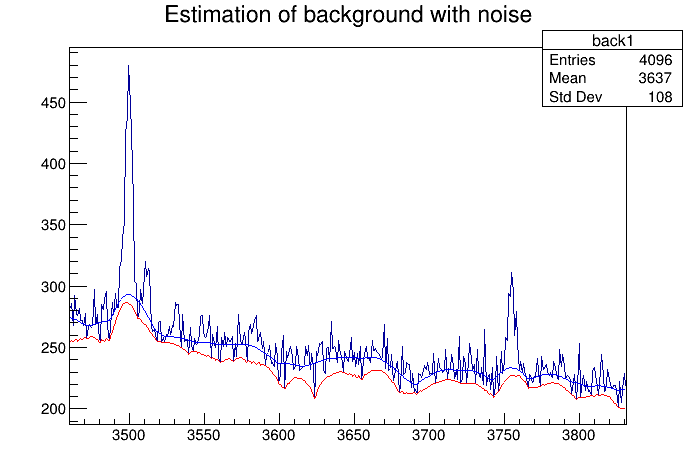

In [2]:
gROOT->GetListOfCanvases()->Draw()